# Exploratory Data Analysis
In this notebook, we will look at data on the movies we have available to include in our modeling. Not all of this information will be used in modeling, but it will let us see trends and features of our data that may influence how our recommender system is set up or interpretted.

In [14]:
# Imports
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Visualizing Review Data

### Reading in our Review Data

In [7]:
reviews = pd.read_csv('../Data/Large-Data/merged_reviews.csv')

/var/folders/jc/vvd13n2d3m33dzsrsg9ydhb00000gn/T/ipykernel_29946/875535838.py:1: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  reviews = pd.read_csv('../Data/Large-Data/merged_reviews.csv')


In [8]:
reviews.head()

,user_id,imdb_id,scaled_rating,title
0,1,tt0110912,10.0,Pulp Fiction
1,1,tt0111495,7.0,Trois couleurs: Rouge
2,1,tt0108394,10.0,Trois couleurs: Bleu
3,1,tt0114787,10.0,Underground
4,1,tt0045152,7.0,Singin' in the Rain


In [13]:
reviews.dtypes

user_id           object
imdb_id           object
scaled_rating    float64
title             object
dtype: object

### Distribution of Reviews

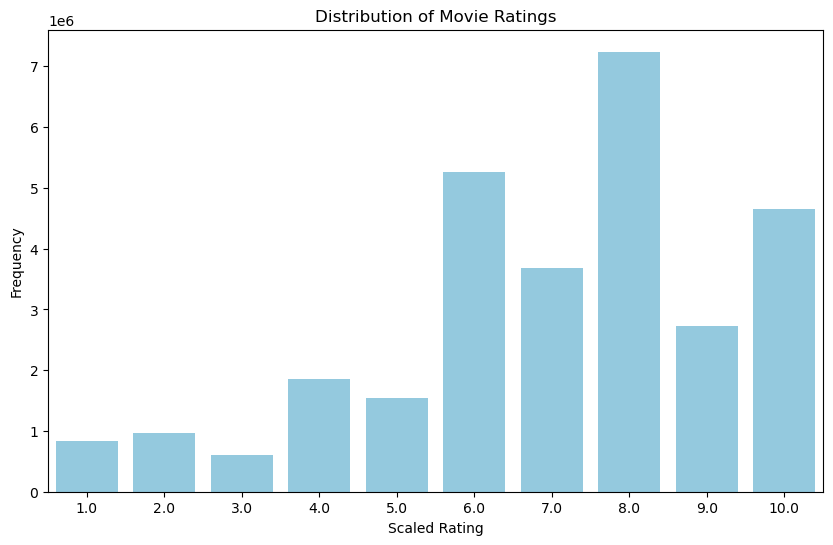

In [17]:
plt.figure(figsize=(10, 6))

sns.countplot(data=reviews, x='scaled_rating', color='skyblue')

plt.title('Distribution of Movie Ratings')
plt.xlabel('Scaled Rating')
plt.ylabel('Frequency')
plt.show()

**Interpretation:** Ratings look like they are typically positive. There are significantly more reviews with a rating 6 or more than there are with a rating of 5 or less. It is interesting that there are also more even-numbered ratings compared to their odd-numbered neighbors. This may be because our MovieLens reviews were originally on a scale of 1-5 in intervals of .5. When they were scaled to match the IMDb reviews, we simply doubled the rating, so 2 became 4, 2.5 became 5, and so on. Could this trend be because MovieLens reviewers tended to favor a rating a movie a whole number?

### Distribution of Reviews by Source

In [19]:
reviews['source'] = reviews['user_id'].astype(str).apply(lambda x: 'MovieLens' if x.isdigit() else 'IMDb')

In [20]:
reviews

,user_id,imdb_id,scaled_rating,title,source
0,1,tt0110912,10.0,Pulp Fiction,MovieLens
1,1,tt0111495,7.0,Trois couleurs: Rouge,MovieLens
2,1,tt0108394,10.0,Trois couleurs: Bleu,MovieLens
3,1,tt0114787,10.0,Underground,MovieLens
4,1,tt0045152,7.0,Singin' in the Rain,MovieLens
...,...,...,...,...,...
29326187,ur0581842,tt0107977,6.0,Robin Hood: Men in Tights,IMDb
29326188,ur3174947,tt0103776,8.0,Batman Returns,IMDb
29326189,ur4592639,tt0107423,9.0,Lipstick on Your Collar,IMDb
29326190,ur4581944,tt0102614,8.0,Out for Justice,IMDb


In [43]:
avg_ratings = reviews.groupby('source')['scaled_rating'].mean()
avg_ratings


source
IMDb         6.740738
MovieLens    7.067661
Name: scaled_rating, dtype: float64

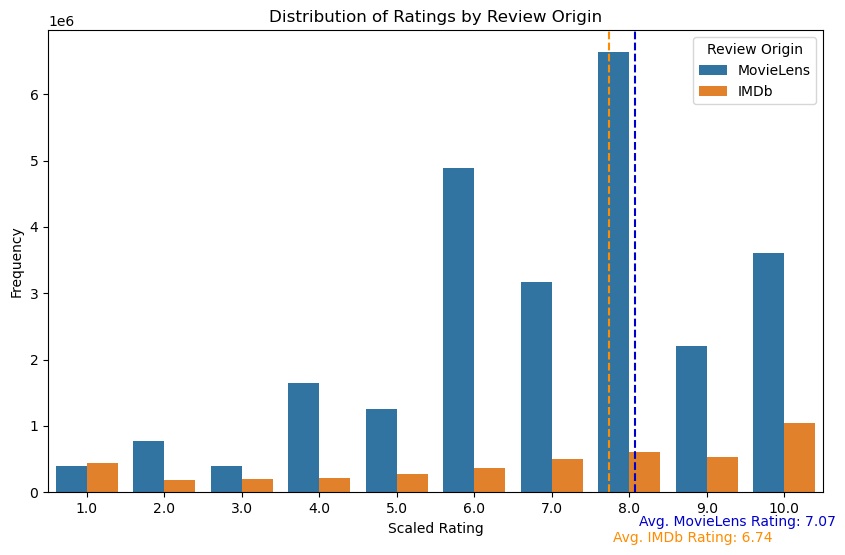

In [44]:
plt.figure(figsize=(10, 6))

sns.countplot(data=reviews, x='scaled_rating', hue='source')

plt.title('Distribution of Ratings by Review Origin')
plt.xlabel('Scaled Rating')
plt.ylabel('Frequency')
plt.legend(title='Review Origin')

plt.axvline(x=round(avg_ratings['IMDb'], 2), linestyle='--', color='darkorange', label=f"Avg. IMDb Rating: {round(avg_ratings['IMDb'], 2)}")
plt.text(avg_ratings['IMDb'] + 0.05, -750000, f"Avg. IMDb Rating: {round(avg_ratings['IMDb'], 2)}", color='darkorange')

plt.axvline(x=round(avg_ratings['MovieLens'], 2), linestyle='--', color='mediumblue', label=f"Avg. MovieLens Rating: {round(avg_ratings['MovieLens'], 2)}")
plt.text(avg_ratings['MovieLens'] + .05, -500000, f"Avg. MovieLens Rating: {round(avg_ratings['MovieLens'], 2)}", color='mediumblue')

plt.show()

**Interpretation:** It looks like our hypothesis was correct, as the trend of even and odd reviews only appears in the MovieLens reviews. This could be from the data collection. If some users were only given the option to give whole number ratings it would skew the results. It looks like MovieLens users are also rate movies more favorably, with an average rating of 7.06 compared to IMDb's 6.74.

## Top Rated Movies
We will be using just MovieLens reviews for this because there may be TV data mixed in with the IMDb reviews.

In [ ]:
ml_reviews = pd.read_csv('')

In [81]:
# Calculate the count of reviews for each movie
reviews_per_movie = reviews.groupby('imdb_id').size()
reviews_per_movie

imdb_id
tt0000001    20
tt0000003    26
tt0000005    18
tt0000007     8
tt0000008    33
             ..
tt9915686    13
tt9916190    62
tt9916270     4
tt9916362     1
tt9916428     1
Length: 244578, dtype: int64

In [87]:
# Filter out movies with less than 5 reviews
movies_over_1000_reviews = reviews_per_movie[reviews_per_movie >= 1000].index
movies_over_1000_reviews

Index(['tt0010323', 'tt0012349', 'tt0013442', 'tt0015648', 'tt0015864',
       'tt0017136', 'tt0017925', 'tt0019254', 'tt0019422', 'tt0020530',
       ...
       'tt9243946', 'tt9471404', 'tt9495224', 'tt9612516', 'tt9614460',
       'tt9649436', 'tt9680440', 'tt9708358', 'tt9778022', 'tt9875006'],
      dtype='object', name='imdb_id', length=4316)

In [88]:
# Filter the DataFrame to include only reviews for valid movies
reviews_filtered = reviews[reviews['imdb_id'].isin(movies_over_1000_reviews)]
reviews_filtered

,user_id,imdb_id,scaled_rating,title,source
0,1,tt0110912,10.0,Pulp Fiction,MovieLens
1,1,tt0111495,7.0,Trois couleurs: Rouge,MovieLens
2,1,tt0108394,10.0,Trois couleurs: Bleu,MovieLens
3,1,tt0114787,10.0,Underground,MovieLens
4,1,tt0045152,7.0,Singin' in the Rain,MovieLens
...,...,...,...,...,...
29326182,ur3174947,tt0103772,8.0,Basic Instinct,IMDb
29326183,ur4592589,tt0356618,2.0,The Forgotten,IMDb
29326186,ur3174947,tt0096895,8.0,Batman,IMDb
29326187,ur0581842,tt0107977,6.0,Robin Hood: Men in Tights,IMDb


In [89]:
# Calculate the average rating for each movie
average_ratings_per_movie = reviews_filtered.groupby(['imdb_id'])['scaled_rating'].mean().reset_index()
average_ratings_per_movie

,imdb_id,scaled_rating
0,tt0010323,7.882414
1,tt0012349,7.961688
2,tt0013442,7.798797
3,tt0015648,7.732002
4,tt0015864,8.126387
...,...,...
4311,tt9649436,7.999090
4312,tt9680440,8.332351
4313,tt9708358,9.840714
4314,tt9778022,9.059342


In [90]:
average_ratings_with_titles = pd.merge(average_ratings_per_movie, reviews_filtered[['imdb_id', 'title']].drop_duplicates(), on='imdb_id', how='left')
average_ratings_with_titles

,imdb_id,scaled_rating,title
0,tt0010323,7.882414,Das Cabinet des Dr. Caligari
1,tt0012349,7.961688,The Kid
2,tt0013442,7.798797,"Nosferatu, eine Symphonie des Grauens"
3,tt0015648,7.732002,Bronenosets Potemkin
4,tt0015864,8.126387,The Gold Rush
...,...,...,...
4311,tt9649436,7.999090,Enaaya
4312,tt9680440,8.332351,Paatal Lok
4313,tt9708358,9.840714,Uncle Tom
4314,tt9778022,9.059342,Abhay


In [91]:
# Sort the movies based on their overall average ratings
top_10_movies = average_ratings_with_titles.sort_values(by = 'scaled_rating', ascending=False).head(10)
top_10_movies

,imdb_id,scaled_rating,title
4307,tt9471404,9.940375,The Chosen
4297,tt8809646,9.841540,College Romance
4313,tt9708358,9.840714,Uncle Tom
3630,tt12392504,9.840074,Scam 1992: The Harshad Mehta Story
4284,tt8110330,9.709277,Dil Bechara
4298,tt8893550,9.709107,Car Masters: Rust to Riches
3465,tt10189514,9.601365,Soorarai Pottru
4267,tt7366338,9.447575,Chernobyl
3401,tt0903747,9.215479,Breaking Bad
3456,tt10048342,9.194212,The Queen's Gambit


In [ ]:
# Plotting the top-rated movies
plt.figure(figsize=(10, 6))

sns.barplot(x=top_10_movies.values, y=top_10_movies['title'], palette='viridis')

plt.title('Top-Rated Movies')
plt.xlabel('Average Rating')
plt.ylabel('Movie Title')

plt.show()

In [ ]:
# Get the titles of the top-rated movies
top_rated_movie_titles = average_ratings_with_titles[average_ratings_with_titles['imdb_id'].isin(top_rated_movies.index)]['title'].unique()


In [50]:










# Plotting the top-rated movies for each user ID format
plt.figure(figsize=(12, 8))

for user_format, data in top_rated_movies.groupby('source'):
    sns.barplot(x='scaled_rating', y='title', data=data, palette='viridis', label=source)

plt.title('Top-Rated Movies by User ID Format (with at least 5 reviews)')
plt.xlabel('Average Rating')
plt.ylabel('Movie Title')
plt.legend(title='User ID Format')
plt.show()

ValueError: 'source' is both an index level and a column label, which is ambiguous.

<Figure size 1200x800 with 0 Axes>

### Highest Rated Movies

In [45]:
# Calculate the average rating for each movie
avg_ratings_per_movie = reviews.groupby('imdb_id')['scaled_rating'].mean()

avg_ratings_per_movie

imdb_id
tt0000001     5.400000
tt0000003     6.230769
tt0000005     7.222222
tt0000007     5.500000
tt0000008     5.060606
               ...    
tt9915686     5.615385
tt9916190     8.129032
tt9916270     4.000000
tt9916362    10.000000
tt9916428     8.000000
Name: scaled_rating, Length: 244578, dtype: float64

In [ ]:
# Filter out movies with less than 5 reviews
valid_movies = reviews_per_movie[reviews_per_movie >= 5].index

In [46]:
# Sort the movies based on their average ratings
top_rated_movies = avg_ratings_per_movie.sort_values(ascending=False).head(10)

top_rated_movies

imdb_id
tt0889165    10.0
tt2993648    10.0
tt0485904    10.0
tt2995000    10.0
tt0051941    10.0
tt2995162    10.0
tt0342453    10.0
tt0051938    10.0
tt0342333    10.0
tt2995878    10.0
Name: scaled_rating, dtype: float64

In [48]:
# Get the titles of the top-rated movies
top_rated_movie_titles = reviews[reviews['imdb_id'].isin(top_rated_movies.index)]['title'].unique()

top_rated_movie_titles

array(['Mogli pericolose', 'An Abstraction on the Chronology of Will',
       'Poop Notice', 'Strain',
       'Magic on Music Mountain: The Story of the Lambertville Music Circus',
       "What's Love Got to Do with It?", "Fish Can't Fly", 'Fûun jôshi',
       'Mit Eva fing die Sünde an', 'En ausencia'], dtype=object)

In [ ]:
# Plotting the top-rated movies
plt.figure(figsize=(10, 6))

sns.barplot(x=top_rated_movies.values, y=top_rated_movie_titles, palette='viridis')

plt.title('Top-Rated Movies')
plt.xlabel('Average Rating')
plt.ylabel('Movie Title')

plt.show()

### Distribution of the Number of Reviews per Movie

In [76]:
reviews_per_movie = reviews_filtered.groupby('imdb_id').size()
reviews_per_movie

imdb_id
tt0000001    20
tt0000003    26
tt0000005    18
tt0000007     8
tt0000008    33
             ..
tt9911196     7
tt9914546     6
tt9914598     6
tt9915686    13
tt9916190    62
Length: 94468, dtype: int64

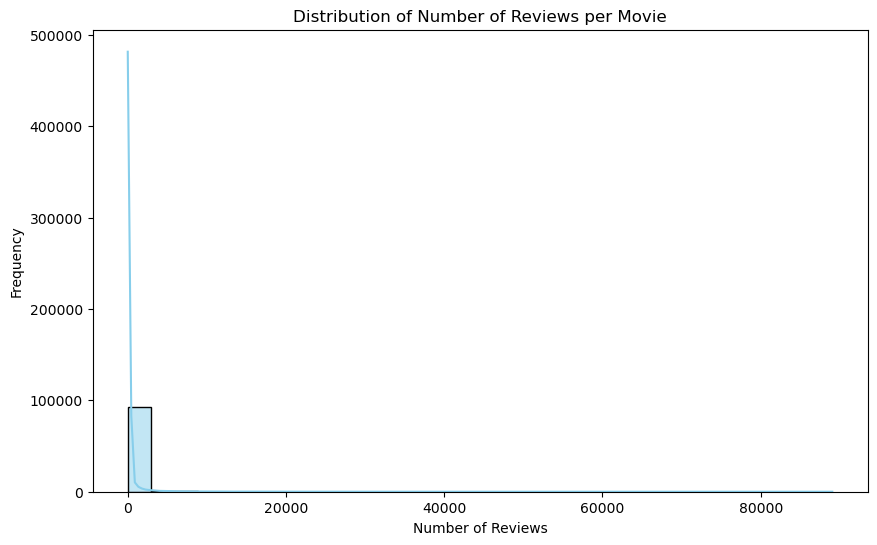

In [77]:
# Plotting the distribution of the number of reviews per movie
plt.figure(figsize=(10, 6))
sns.histplot(reviews_per_movie, bins=30, kde=True, color='skyblue')
plt.title('Distribution of Number of Reviews per Movie')
plt.xlabel('Number of Reviews')
plt.ylabel('Frequency')
plt.show()